In [2]:
import pandas as pd

hour_df = pd.read_csv("hour.csv")

In [3]:
print(hour_df.shape)

(17379, 17)


#### The dataset contains more than 17k records with 17 attributes (variables). Let’s check the top few rows to see how the data looks

In [4]:
# show the first five rows
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Before jumping into type casting attributes, lets rename attribute names to make them more understandable and pythonic.

In [5]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'}, inplace = True)

In [6]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
#checking
hour_df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

#### Now that we have attribute names cleaned up, we perform type-casting of attributes using utilities like pd.to_datetime() and astype().

In [8]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [9]:
#checking
hour_df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

# Data Distribution and Pattern

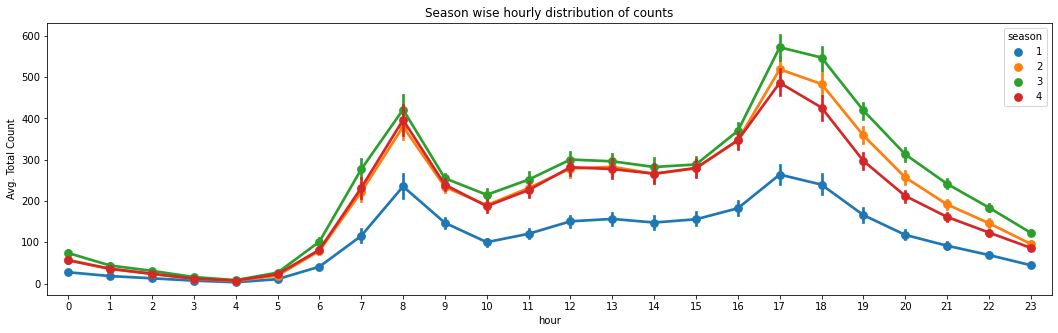

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(18,5))

sns.pointplot(data=hour_df[['hour','total_count','season']],
             x='hour',y='total_count',
             hue='season')

plt.ylabel("Avg. Total Count")
plt.title("Season wise hourly distribution of counts")
plt.show()

In [11]:
df = hour_df[(hour_df['hour'] == 9) & (hour_df['season'] == 1)]
df['total_count'].mean()

147.0167597765363

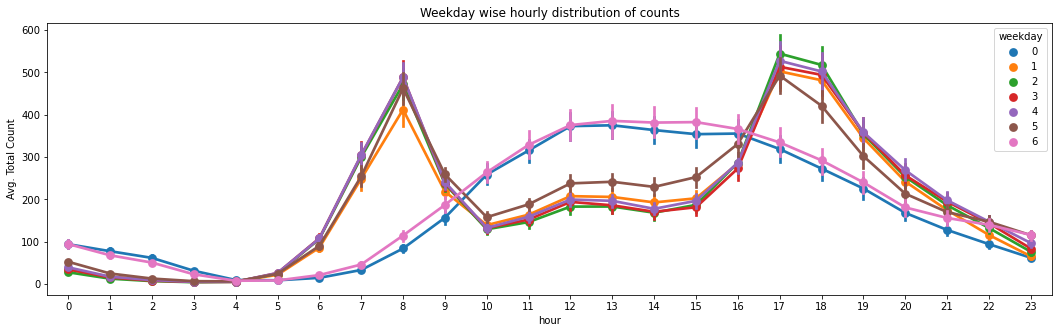

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(18,5))

sns.pointplot(data=hour_df[['hour','total_count','weekday']],
             x='hour',y='total_count',
             hue='weekday')

plt.ylabel("Avg. Total Count")
plt.title("Weekday wise hourly distribution of counts")
plt.show()

#### Having observed hourly distribution of data across different categoricals, let’s visualize monthly ridership trends.

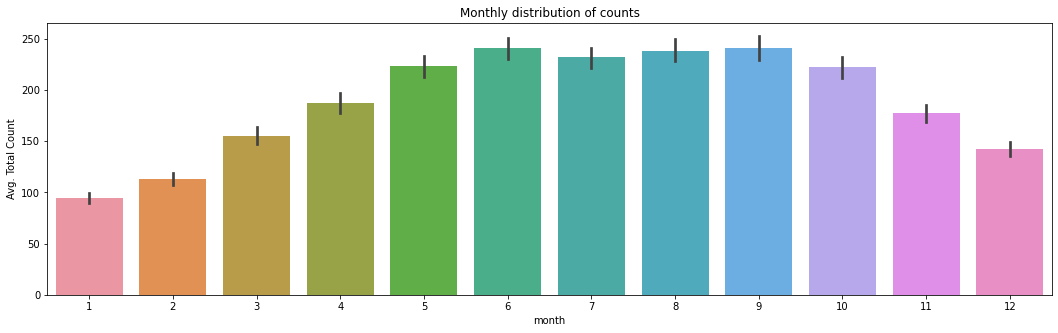

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(18,5))

sns.barplot(data=hour_df[['month','total_count']],
             x='month',y='total_count')

plt.ylabel("Avg. Total Count")
plt.title("Monthly distribution of counts")
plt.show()

#### Lets try and plot the ridership trend for four seasons.

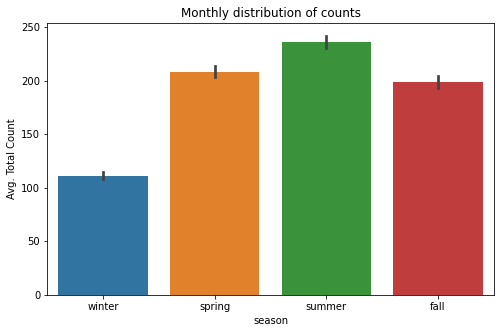

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(8,5))

sns.barplot(data=hour_df[['season','total_count']],
             x='season',y='total_count')

plt.ylabel("Avg. Total Count")
plt.xticks([0,1,2,3],['winter','spring','summer','fall'])
plt.title("Monthly distribution of counts")
plt.show()

#### Lets see how whether a working day or non-working day affects bike sharing.

<Figure size 576x360 with 0 Axes>

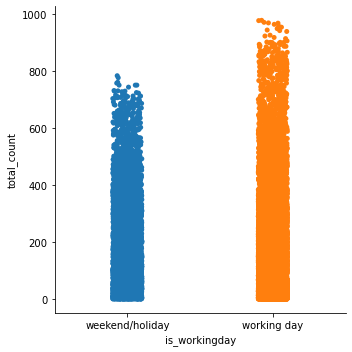

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(8,5))

sns.catplot(x="is_workingday", y="total_count",data = hour_df[['is_workingday','total_count']])
plt.xticks([0,1],['weekend/holiday','working day'])
plt.show()

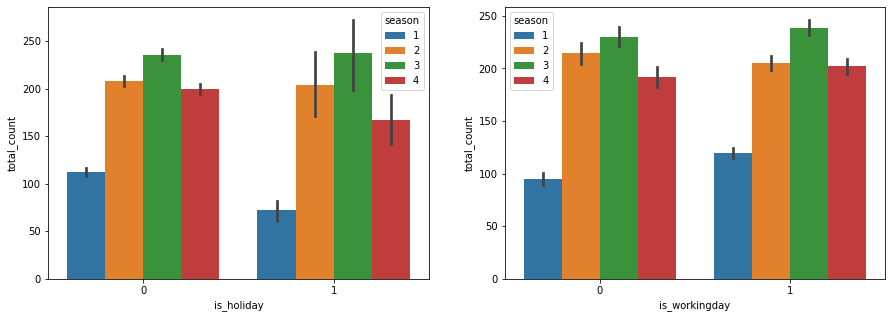

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(15,5))

sns.barplot(data=hour_df,x='is_holiday',y = 'total_count',hue = 'season',ax = ax1)
sns.barplot(data=hour_df,x='is_workingday',y = 'total_count',hue = 'season',ax = ax2)
plt.show()

#### Let’s look at the distribution at year level.

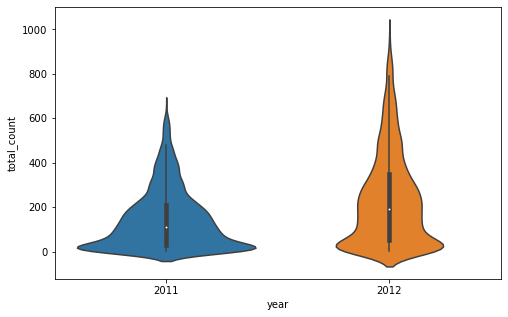

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(8,5))

sns.violinplot(data=hour_df[['year','total_count']], x="year", y="total_count")

plt.xticks([0, 1], ['2011','2012'])
plt.show()

# Outliers

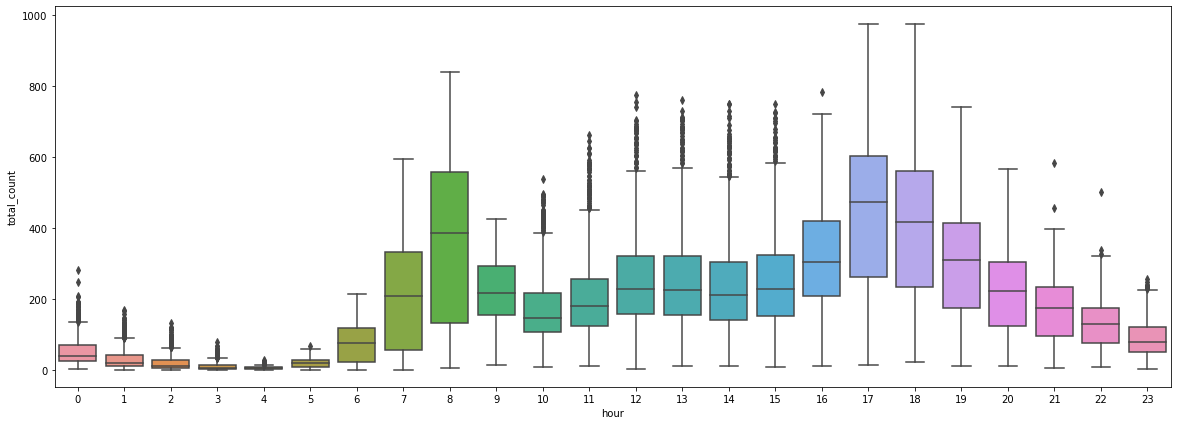

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(20,7))
sns.boxplot(data=hour_df[['hour','total_count']], x="hour", y="total_count")

plt.show()

# Correlations

##### Correlation helps us understand relationships between different attributes of the data.

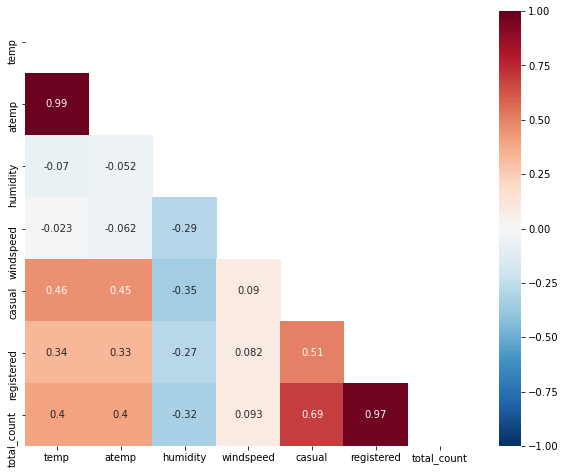

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Plotting a diagonal correlation matrix

correlation = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
plt.figure(figsize=(10, 8)) # set figure size

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
# print(mask)

sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, vmax = +1, cmap="RdBu_r",mask=mask)
plt.show()